<a href="https://colab.research.google.com/github/ReynadelYolo/ML_Projects/blob/main/Breast_Cancer_Prediction_V1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

Work in cancer prediction with the help of 3 diferent models of supervised models

Objective: Search and choose the most accurate model

In [1004]:
#Libraries Data manipulation and analysis
import pandas as pd
import numpy as np

#Libraries visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Sklearn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  mean_squared_error,classification_report,confusion_matrix, precision_score,accuracy_score,f1_score,recall_score,auc,roc_curve
from sklearn import metrics

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#warning
import warnings
warnings.filterwarnings ('ignore')

In [1005]:
#Link to the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/abdelDebug/Breast-Cancer-Dataset/refs/heads/main/breast_cancer_dataset.csv')


##Data Exploration

Basic Data Exploration

In [1006]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1007]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [1008]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1009]:
df.shape

(569, 32)

In [1010]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [1011]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [1012]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1013]:
#finding if there is missing values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [1014]:
#review if the dataset has duplicates
df.duplicated().sum()

np.int64(0)

In [1015]:
numeric_cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

#Selection of target variable "diagnosis"

In [1016]:
# Target variable
y = df['diagnosis']
x = df[numeric_cols]

In [1017]:
# Count the occurrences of the target variable
print("\nDistribution of the target variable:")
print(df['diagnosis'].value_counts())


Distribution of the target variable:
diagnosis
B    357
M    212
Name: count, dtype: int64


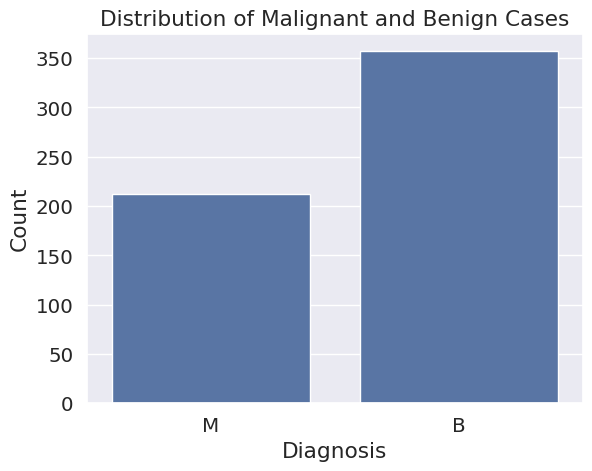

In [1018]:
# Distribution of the target variable (Malignant vs Benign)
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Malignant and Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [1019]:
#Droping target variable and id of the dataset
X = df.drop(['id','diagnosis'],axis=1)

#Split data set into training and test

In [1020]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [1021]:
#Shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [1022]:
#Subset of the data set with the target variable
M = df[df.diagnosis== "M"]   # 'M' was mapped to 1
B = df[df.diagnosis == "B"]  # 'B' was mapped to 0

##StandardScaler

In [1023]:
scaler = StandardScaler()
#df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1024]:
#Basic statistics numerical values
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Measure weight of features


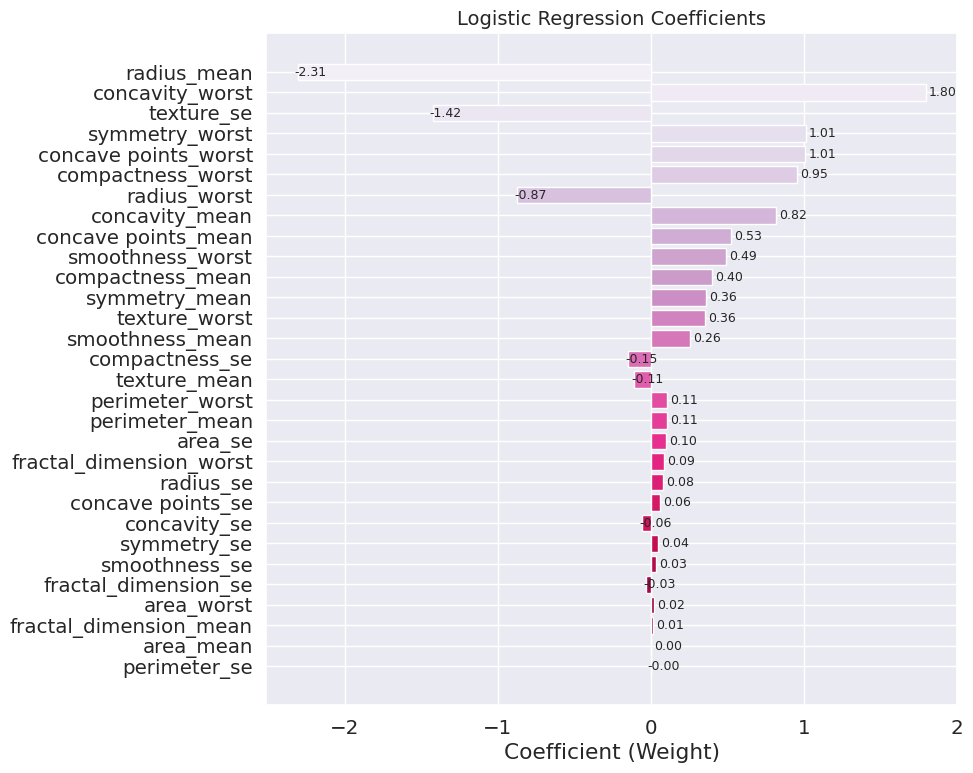

In [1025]:
# Fit logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

all_coeffs = log_reg.coef_[0] # Coefficients match with feature names
all_features = X.columns

# Absolute value
sorted_idx = np.argsort(np.abs(all_coeffs))[::-1]
all_features = all_features[sorted_idx]
all_coeffs = all_coeffs[sorted_idx]

plt.figure(figsize=(10, 8))
bars = plt.barh(all_features, all_coeffs, color=sns.color_palette("PuRd", len(all_features)))
plt.gca().invert_yaxis()  # Highest at the top to select the best features

for bar, weight in zip(bars, all_coeffs):
    width = bar.get_width()
    plt.text(width + 0.02 * np.sign(width),
             bar.get_y() + bar.get_height()/2,
             f"{weight:.2f}",
             va='center', fontsize=9)

plt.title("Logistic Regression Coefficients", fontsize=14)
plt.xlabel("Coefficient (Weight)")
plt.tight_layout()
plt.show()

In [1026]:
#Acording with the weights of the output of logistic regression I choose this features for the rest of the project
features=['texture_worst','radius_se', 'radius_worst', 'area_se', 'area_worst', 'concave points_mean','concave points_worst', 'symmetry_worst',  'concavity_worst', 'concavity_mean']

#Boxplots to spot outliers

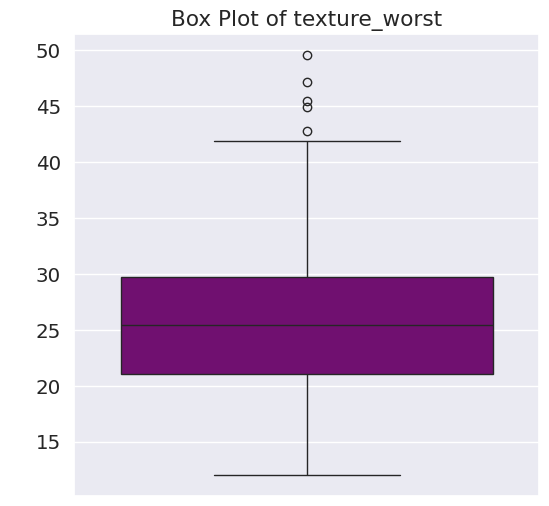

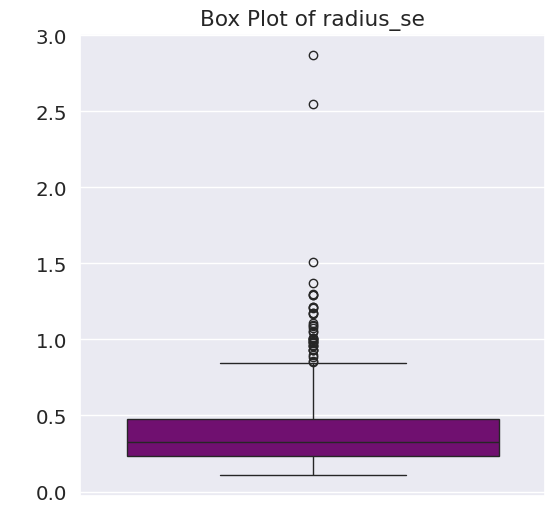

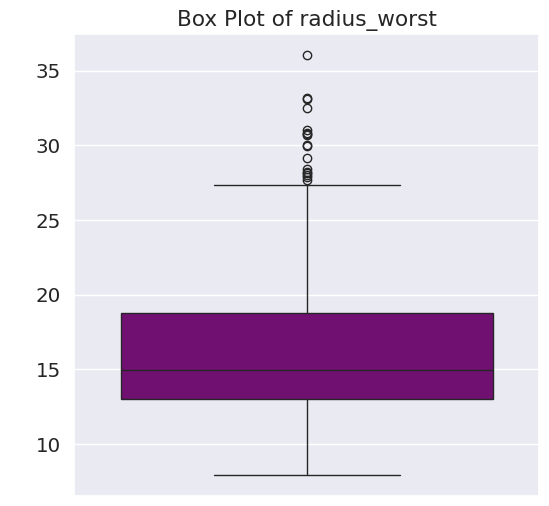

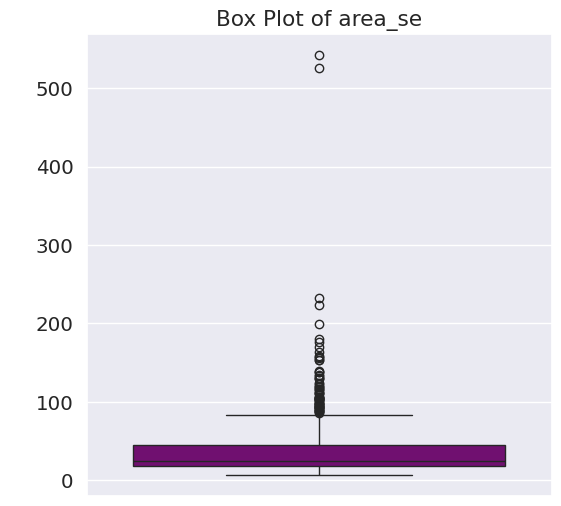

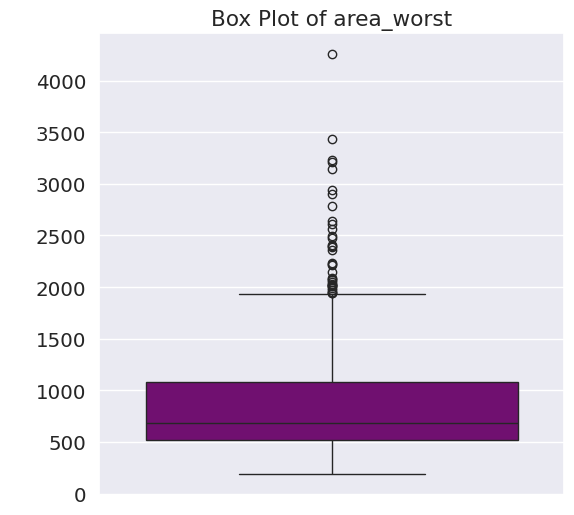

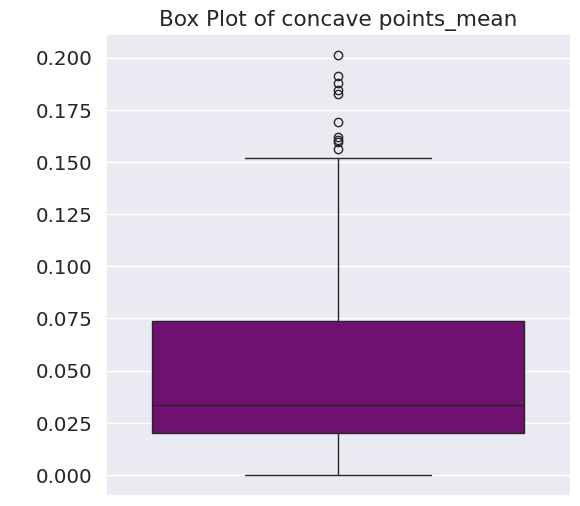

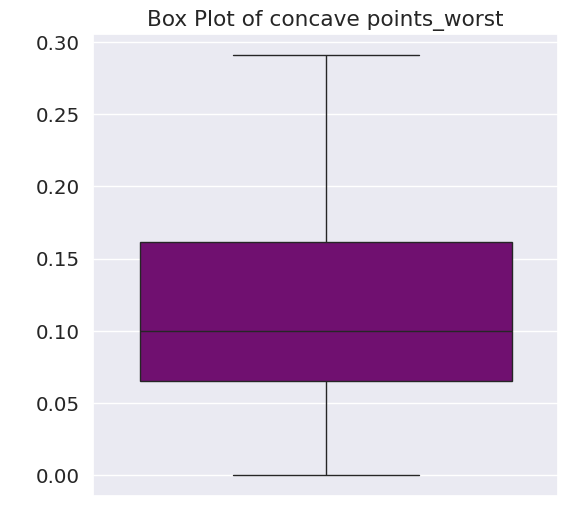

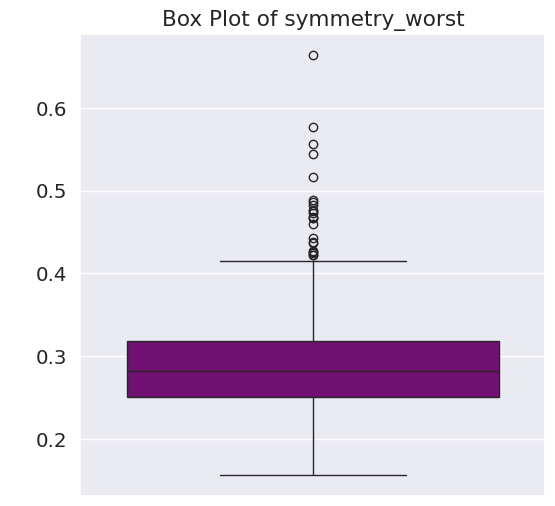

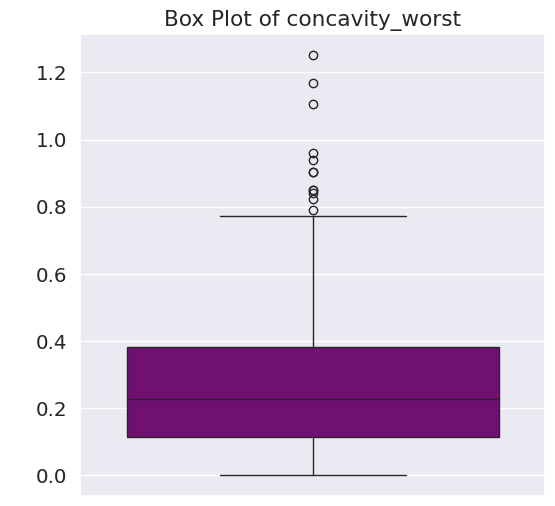

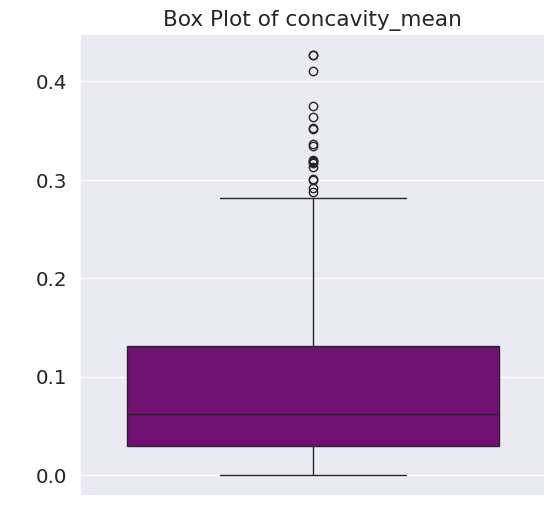

In [1027]:
#Just for the selected variables
columns_to_plot = features

for col in columns_to_plot:

    plt.figure(figsize=(6, 6))
    sns.boxplot(df[col], color='purple')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(' ')
    plt.show()

# Remove the outliers with winzorization

In [1028]:
from scipy.stats.mstats import winsorize

In [1029]:
df_cap = X.copy()

In [1030]:
def percentile_capping(df, cols, from_low_end, from_high_end):

    for col in X.columns:
      lower_bound = df[col].quantile(from_low_end)
      upper_bound = df[col].quantile(1-from_high_end)

      df[col] = np.where(df[col]>upper_bound, upper_bound,
      np.where(df[col]<lower_bound, lower_bound, df[col]))

      winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [1031]:
# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
percentile_capping (df_cap,features, 0.01, 0.01)

In [1032]:
df_cap.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.113362,19.263470,91.889771,651.295227,0.096305,0.104193,0.088369,0.048689,0.181089,0.062729,...,16.252581,25.659471,107.132718,876.073835,0.132252,0.252982,0.270579,0.114480,0.289473,0.083769
std,3.439789,4.192831,23.752853,334.962197,0.013554,0.051881,0.078109,0.038033,0.026530,0.006721,...,4.754601,5.996528,33.020473,548.004368,0.022165,0.151712,0.202652,0.065417,0.058421,0.017097
min,8.458360,10.930400,53.827600,215.664000,0.068654,0.033351,0.000000,0.000000,0.129508,0.051504,...,9.207600,15.200800,58.270400,256.192000,0.087910,0.050094,0.000000,0.000000,0.176028,0.058580
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,24.371600,30.652000,165.724000,1786.600000,0.132888,0.277192,0.351688,0.164208,0.259564,0.085438,...,30.762800,41.802400,208.304000,2918.160000,0.188908,0.778644,0.902380,0.269216,0.486908,0.140628


##Plots features after and befor winsorization

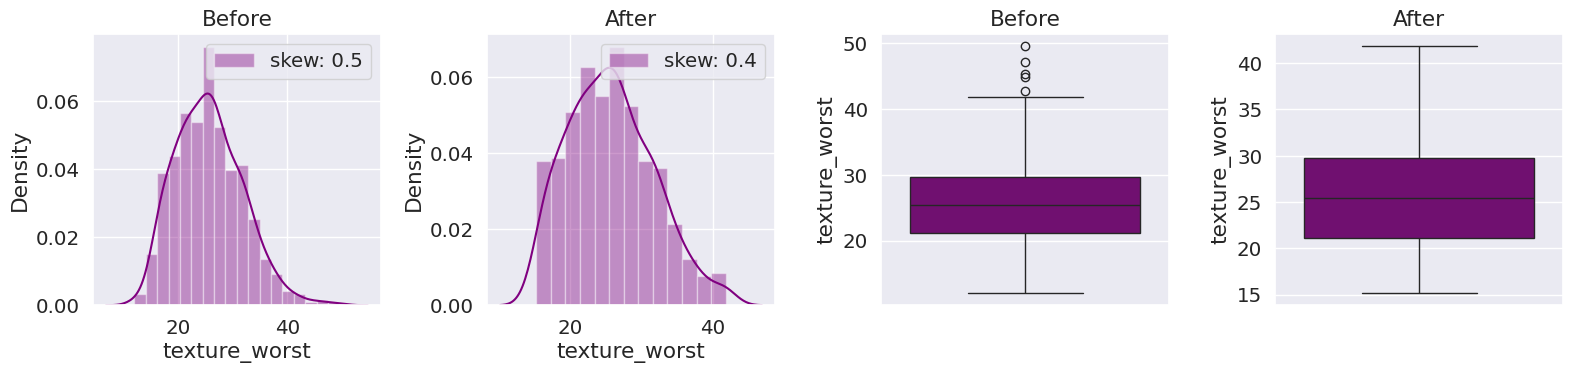

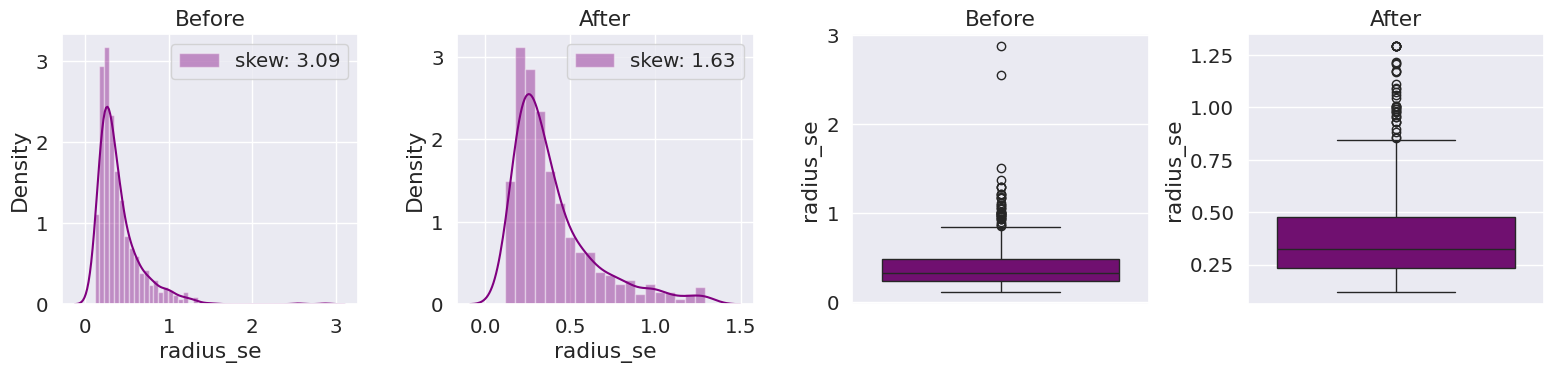

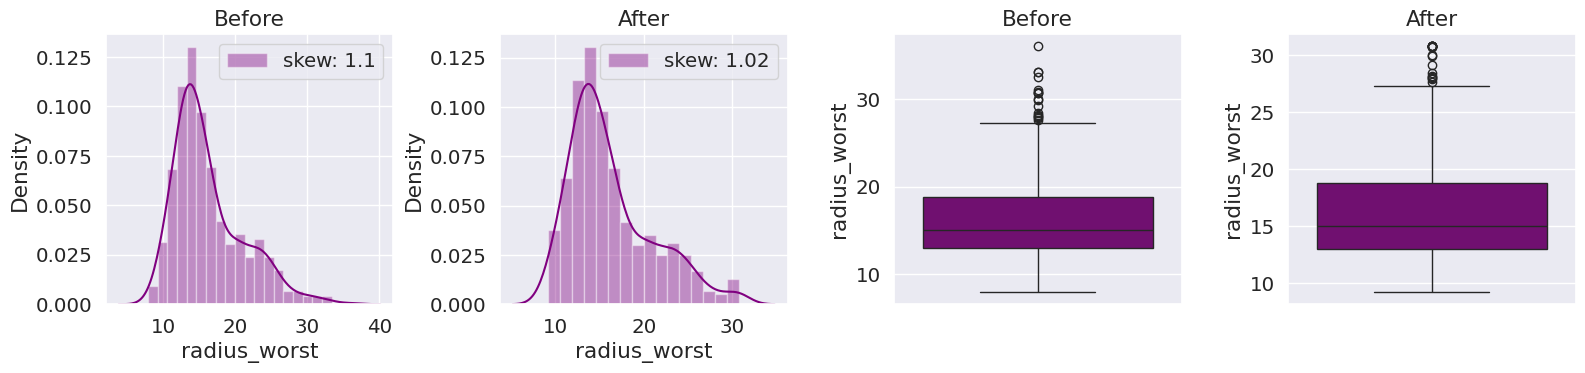

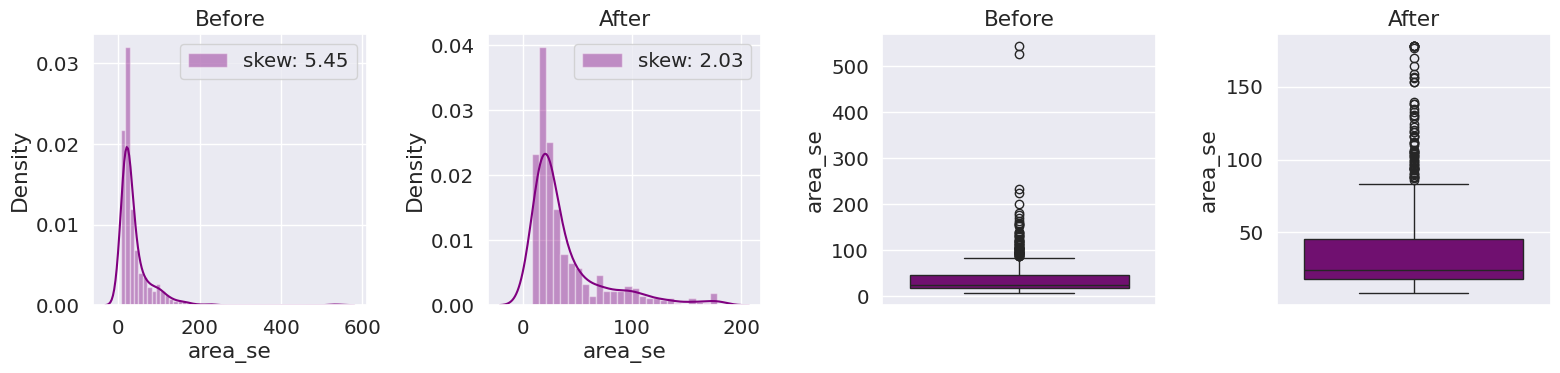

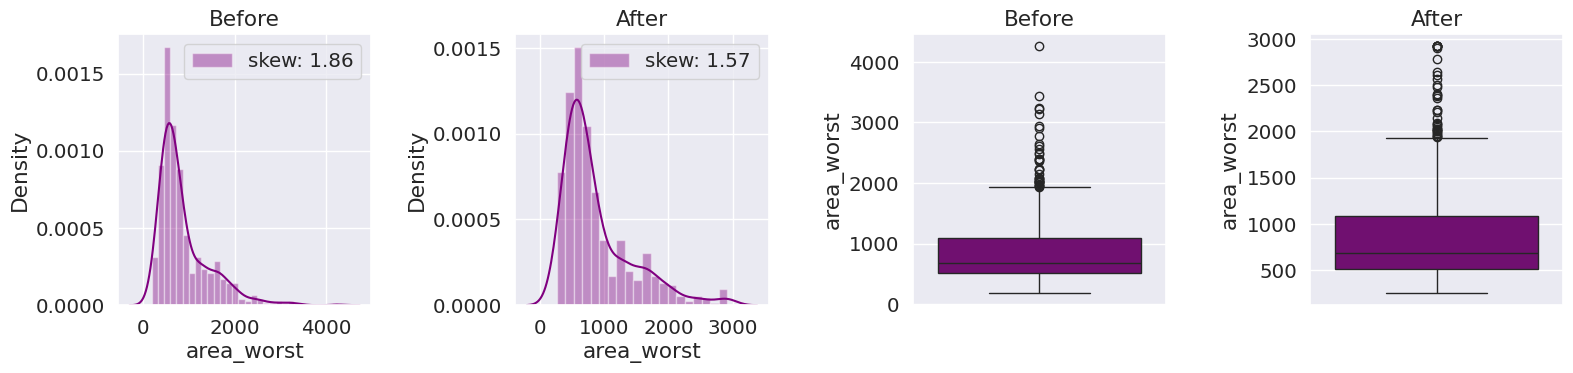

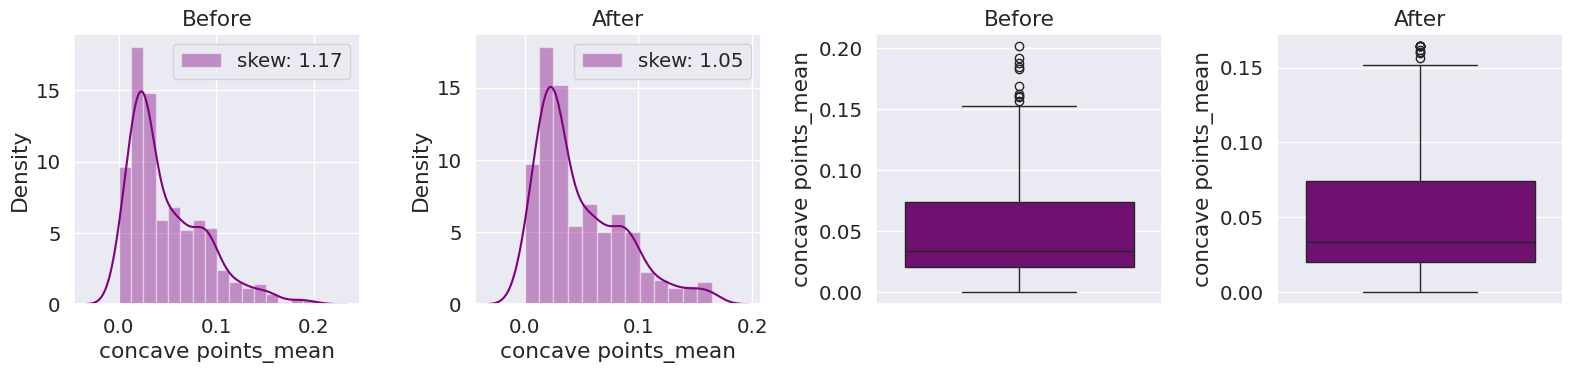

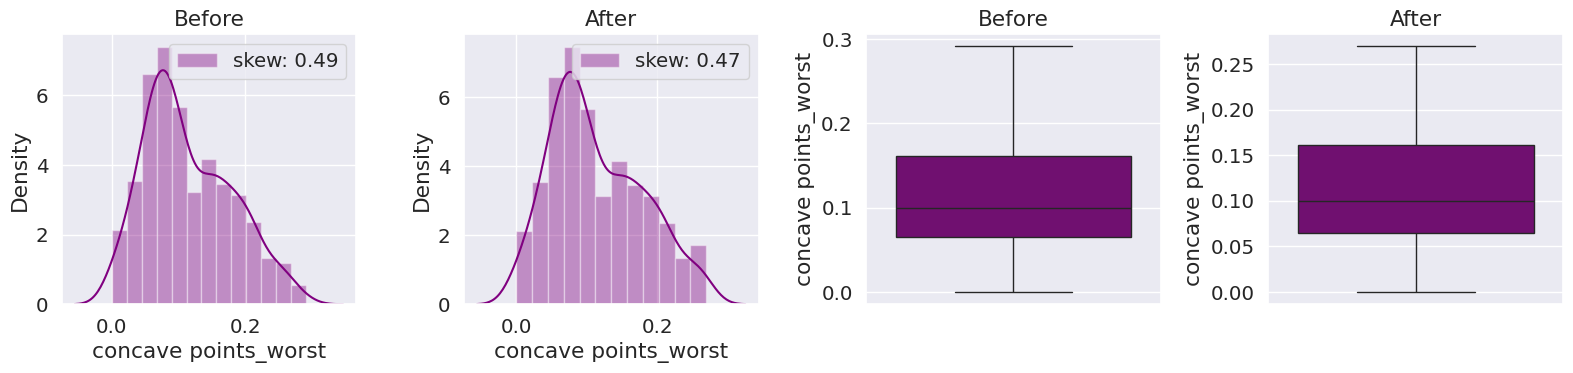

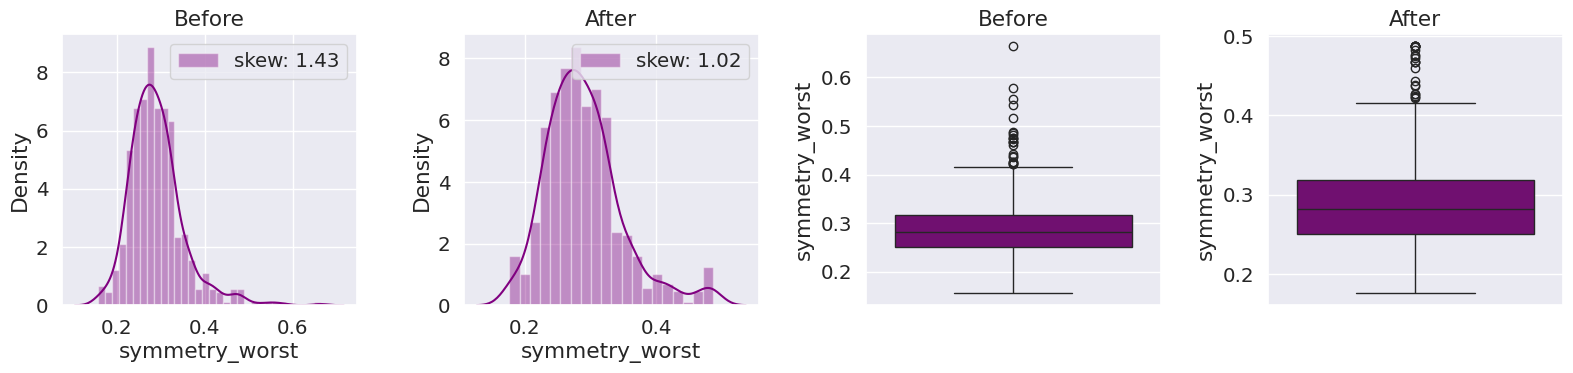

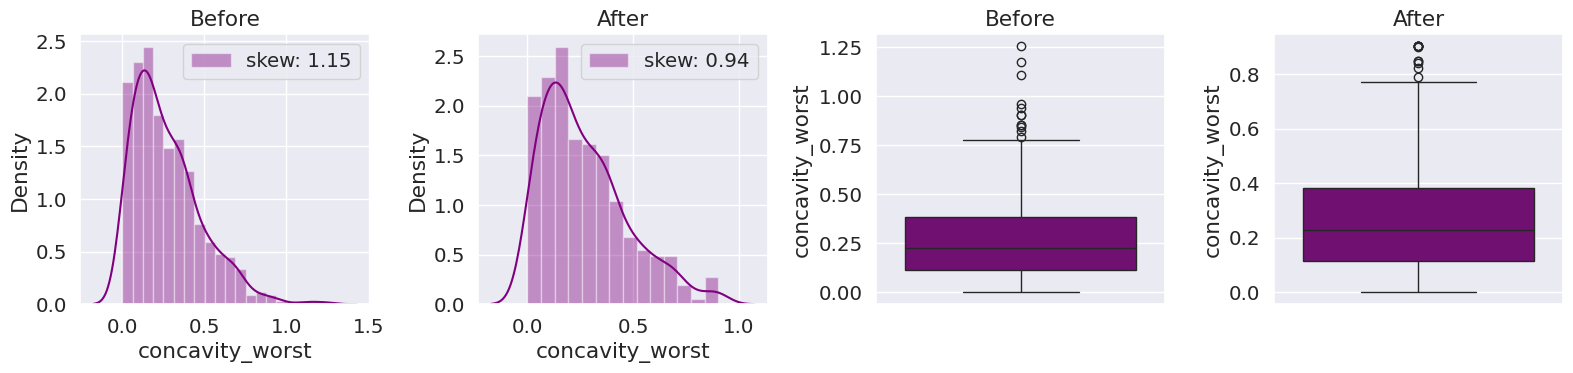

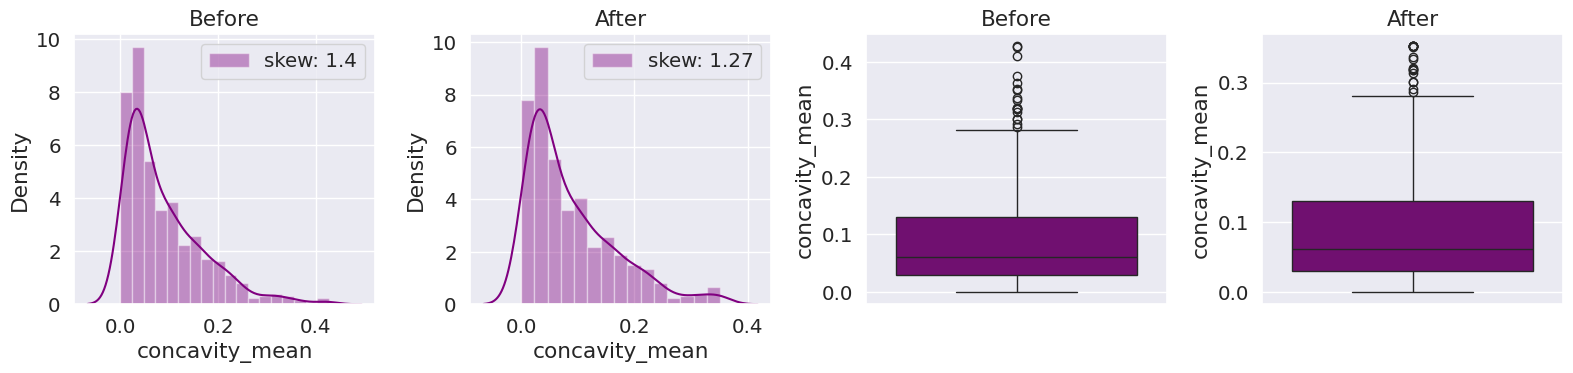

In [1033]:
for col in features:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(df[col], color='purple',label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(df_cap[col], color='purple' ,label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(df[col],color='purple')
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(df_cap[col],color='purple')
    plt.title('After')
    plt.tight_layout()
    plt.show()

# Plots of features after winsorization vs diagnosis

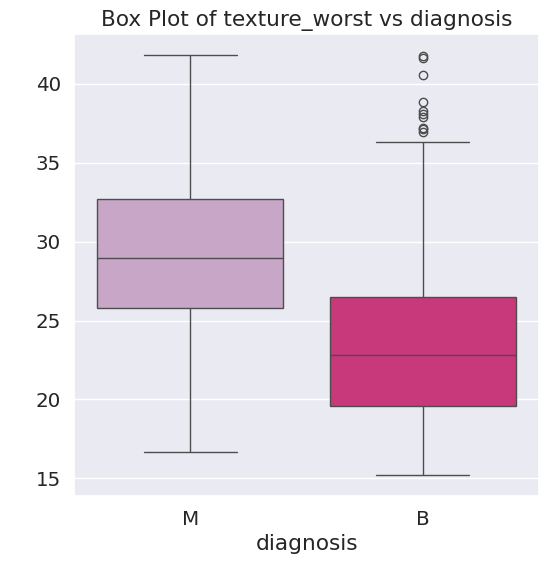

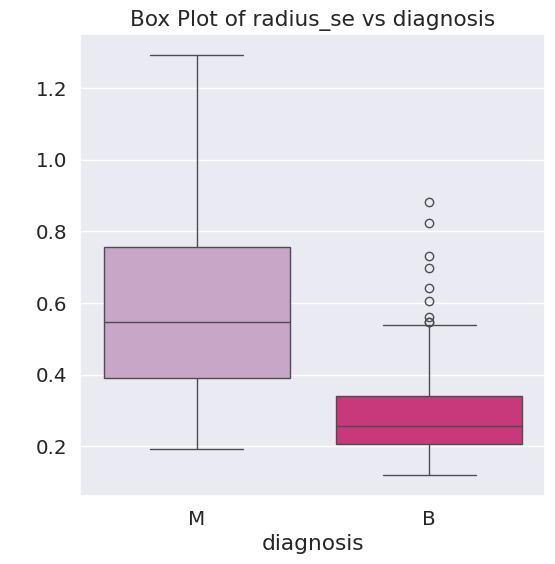

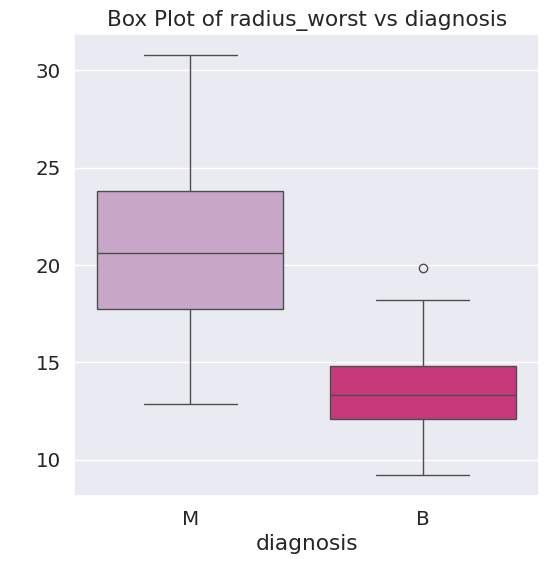

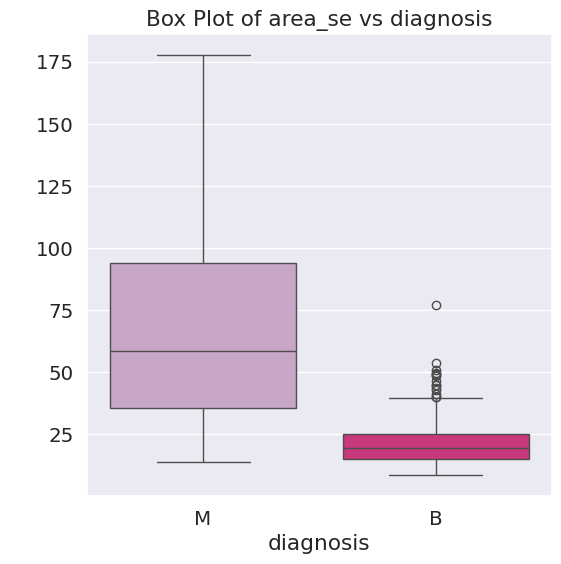

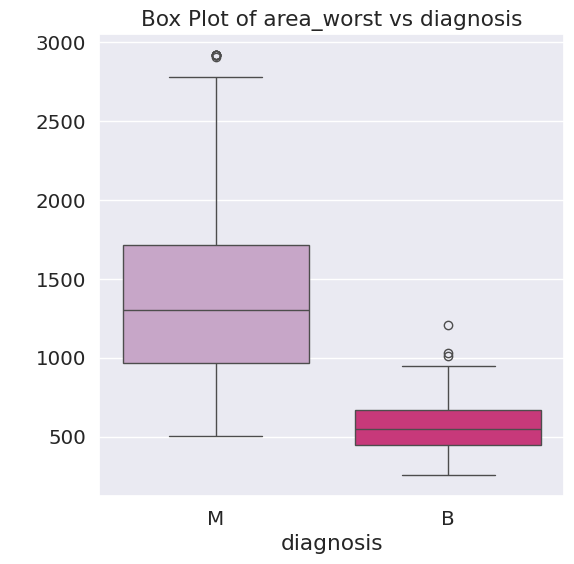

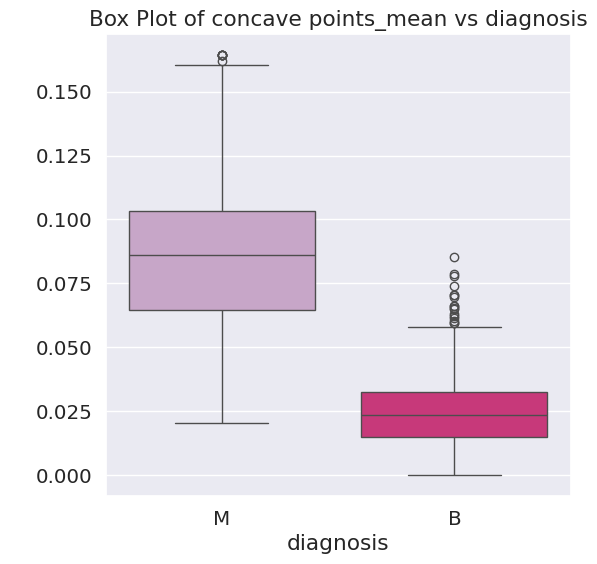

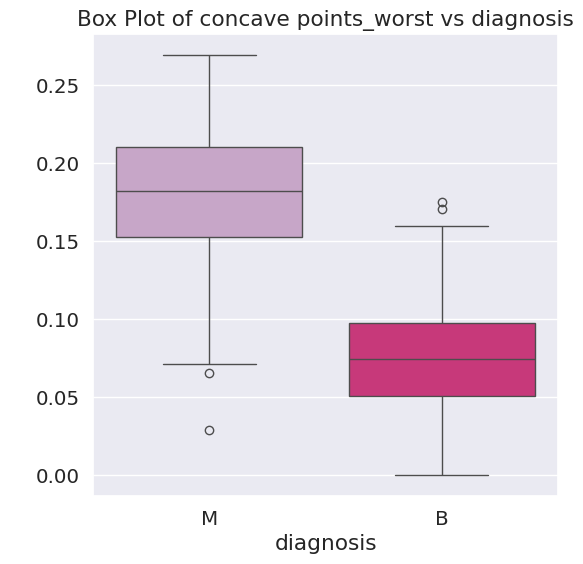

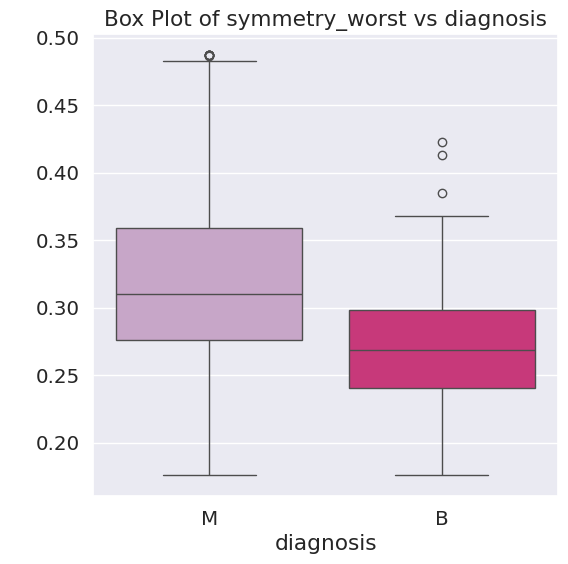

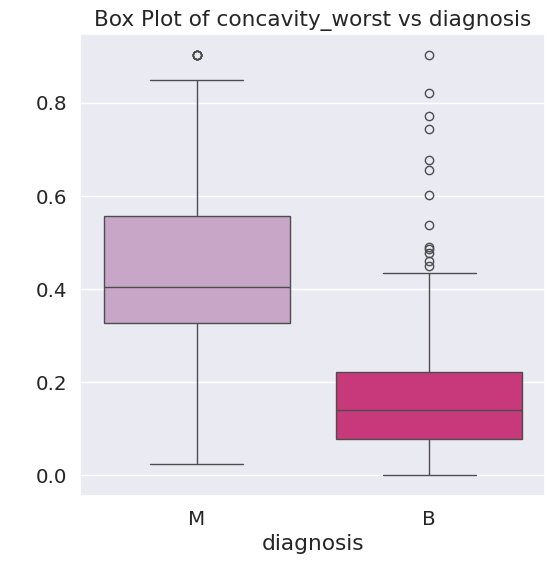

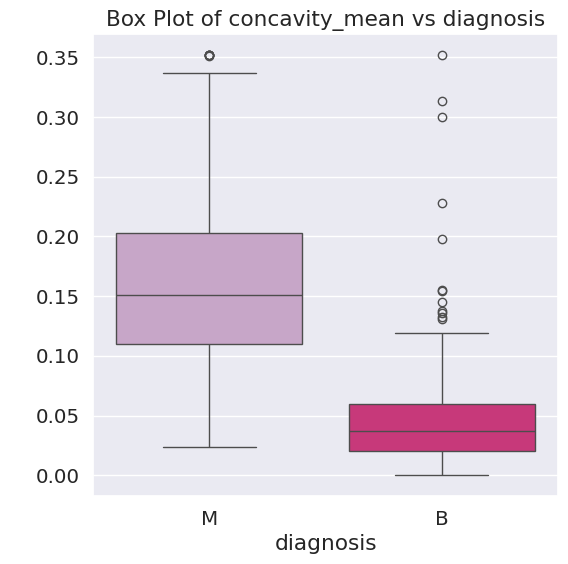

In [1034]:
columns_to_plot = features

for col in columns_to_plot:

    plt.figure(figsize=(6, 6))
    plot_data = df_cap.copy()
    plot_data['diagnosis'] = y
    sns.boxplot(y=col, x='diagnosis', data=plot_data, palette='PuRd')
    plt.title(f'Box Plot of {col} vs diagnosis')
    plt.ylabel(' ')
    plt.show()

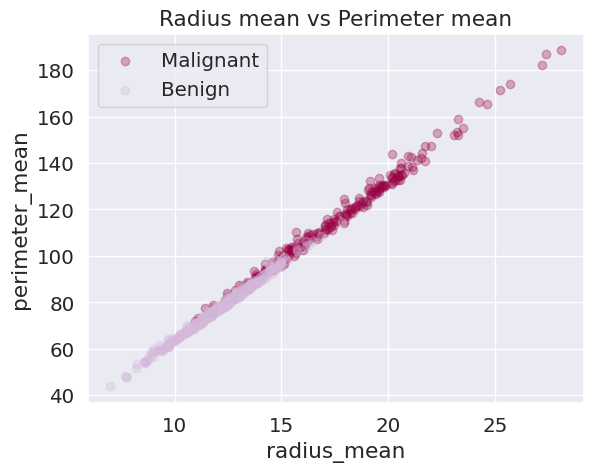

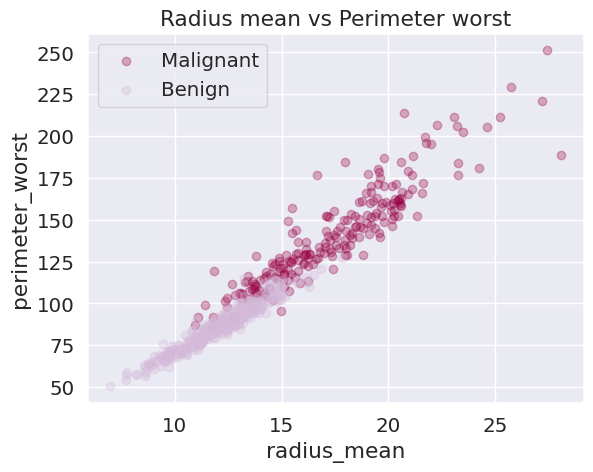

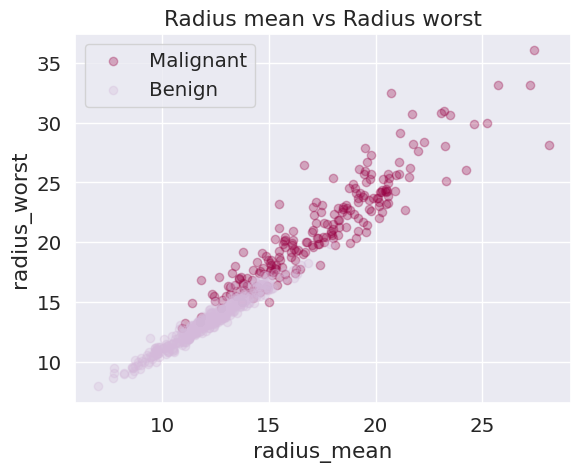

In [1035]:
#More plots of the features selected to visualize data
plt.title("Radius mean vs Perimeter mean")
plt.xlabel("radius_mean")
plt.ylabel("perimeter_mean")
plt.scatter(M.radius_mean, M.perimeter_mean, color = "#980043", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.perimeter_mean, color = "#d4b9da", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Radius mean vs Perimeter worst")
plt.xlabel("radius_mean")
plt.ylabel("perimeter_worst")
plt.scatter(M.radius_mean, M.perimeter_worst, color = "#980043", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.perimeter_worst, color = "#d4b9da", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

plt.title("Radius mean vs Radius worst")
plt.xlabel("radius_mean")
plt.ylabel("radius_worst")
plt.scatter(M.radius_mean, M.radius_worst, color = "#980043", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.radius_worst, color = "#d4b9da", label = "Benign", alpha = 0.3)
plt.legend()

plt.show()

#Correlation Matrix

##Correlation of all of the features

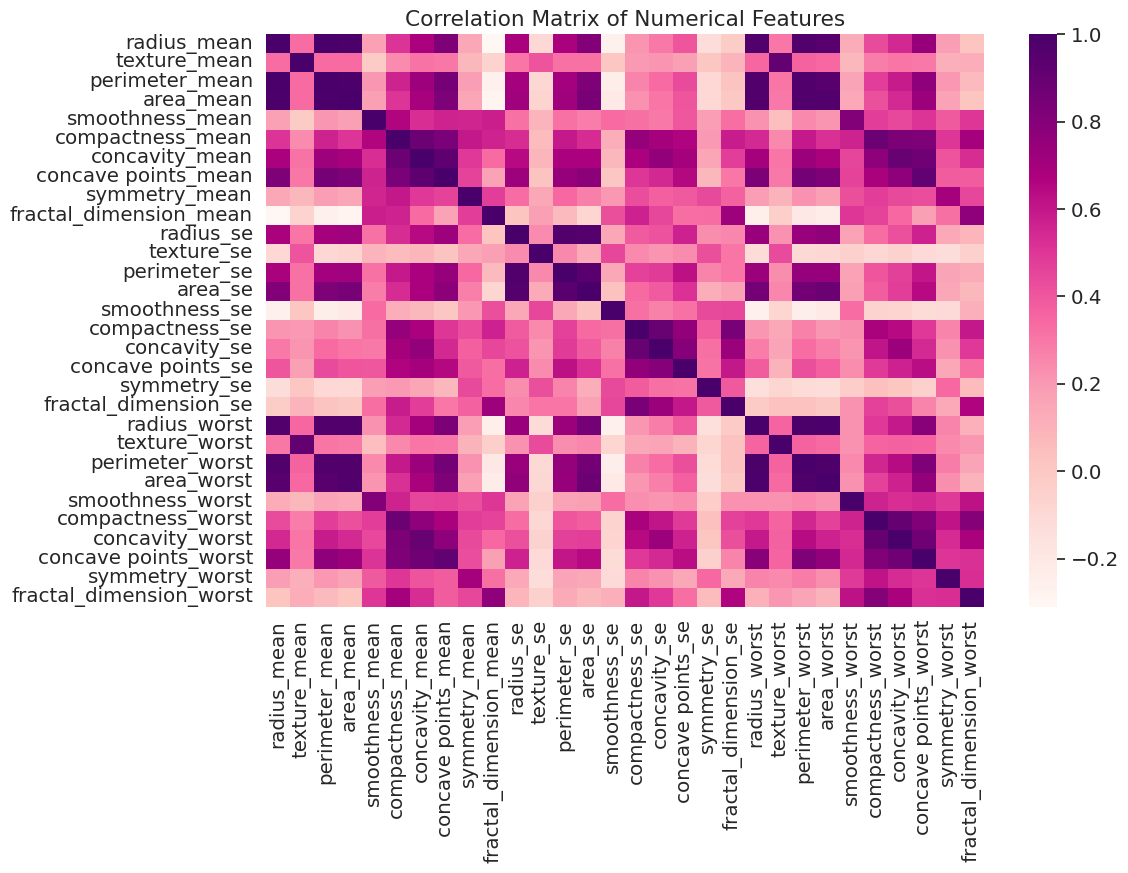

In [1036]:
#Correlation of all of the features
correlation_matrix = df_cap[X.columns].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=False, cmap='RdPu')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

##Correlation with the target variable

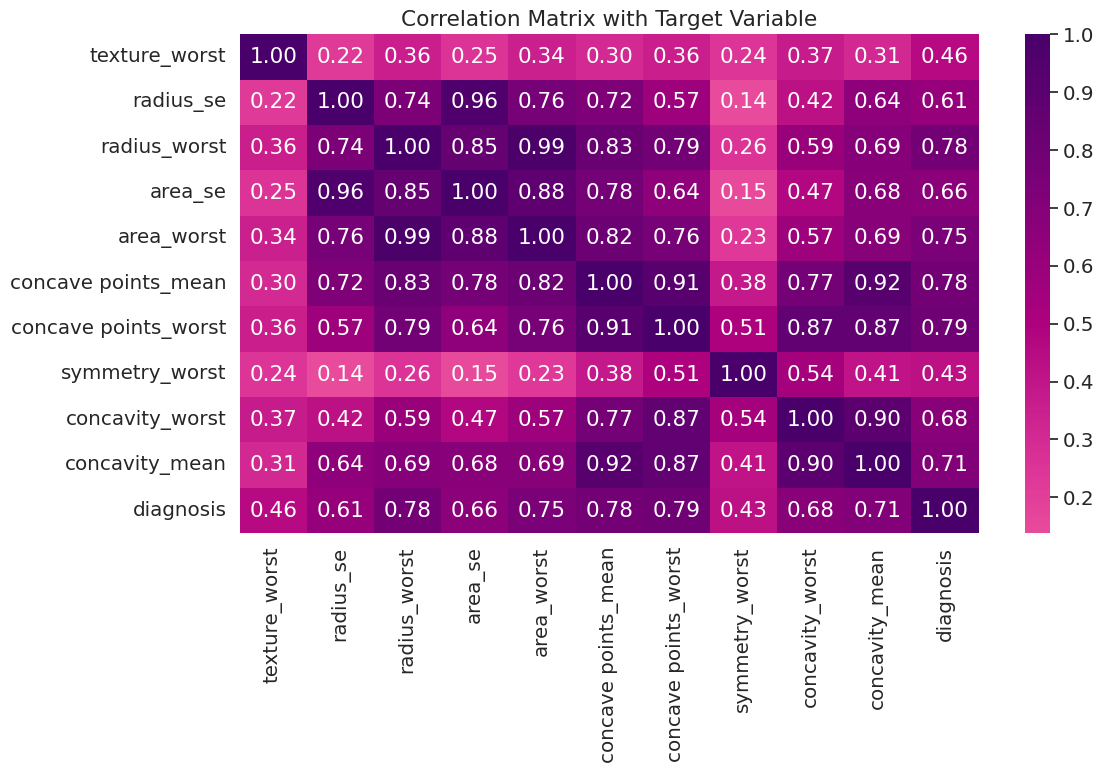

In [1037]:
# Correlation with the target variable
df_cap['diagnosis'] = y.map({'M': 1, 'B': 0})
correlation_matrix = df_cap[features + ['diagnosis']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdPu', center=0)
plt.title('Correlation Matrix with Target Variable')
plt.tight_layout()
plt.show()



##Heatmap of the features correlation with percentage

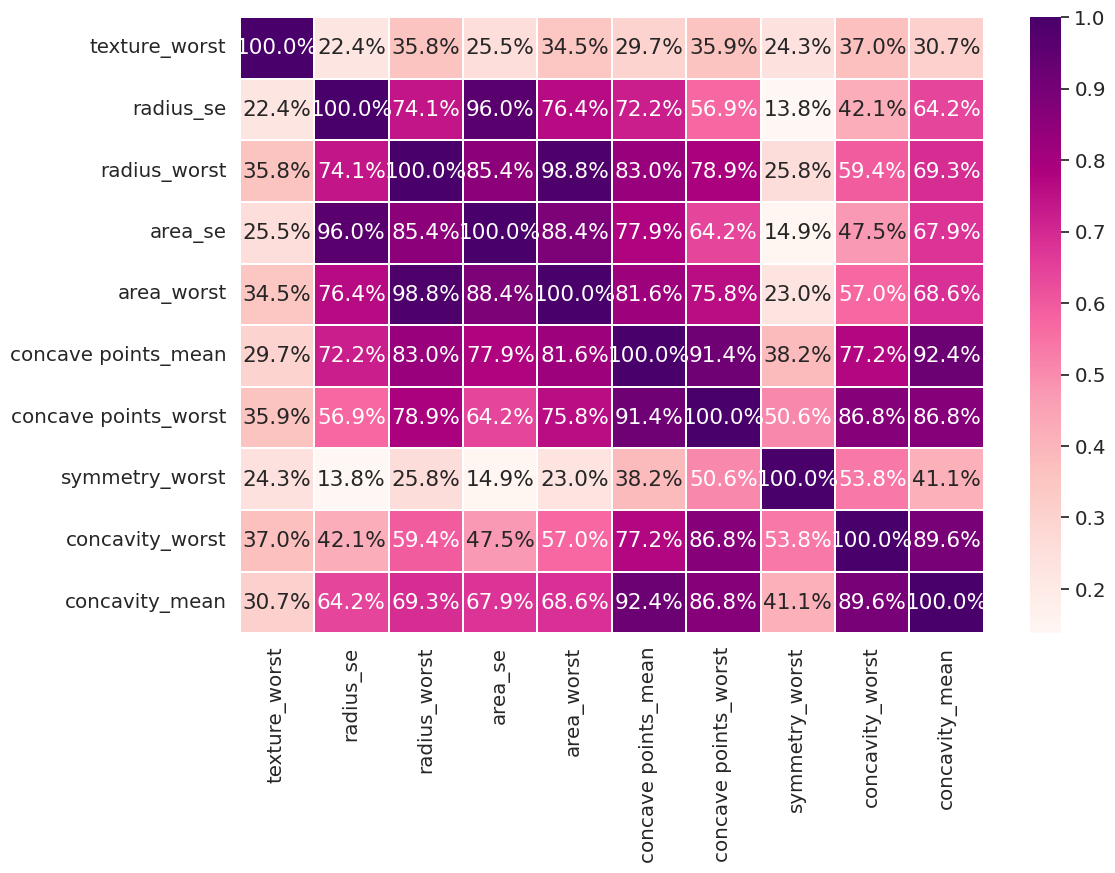

In [1038]:
#Heatmap of the features correlation with percentage
plt.figure(figsize=(12, 8))
cmap =plt.get_cmap('RdPu')
#cmap = sns.RdPu_palette( 1000, 120, as_cmap=True)
sns.heatmap(df_cap[features].corr(), annot=True, fmt='.1%',  linewidths=.08, cmap=cmap);

# 1st Model "Decision Tree"

In [1039]:
dt = DecisionTreeClassifier()


In [1040]:
dt_default = df_cap.copy()

In [1041]:
# Definition of target variable
y= df['diagnosis']   # Target labels
X = dt_default

In [1042]:
# Split the dataset into training and testing sets (70% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [1043]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1044]:
# Evaluate the model's accuracy on the test set
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy  * 100:.2f}%")
total_accuracy = {}
total_accuracy['Decision Tree (Initial)'] = accuracy

Model Accuracy: 100.00%


In [1045]:
dt=clf.predict(X_test)

In [1046]:
print(f" Classification report Decision Tree :\n {classification_report(y_test,dt)}")

 Classification report Decision Tree :
               precision    recall  f1-score   support

           B       1.00      1.00      1.00       108
           M       1.00      1.00      1.00        63

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [1047]:
print("Accuracy (Test Set): %.3f" % accuracy_score(y_test,dt))
print("F1-Score (Test Set): %.3f" % f1_score(y_test,dt,pos_label="M")) #We use in adition pos_label because the target value is categorical instead of numerical

Accuracy (Test Set): 1.000
F1-Score (Test Set): 1.000


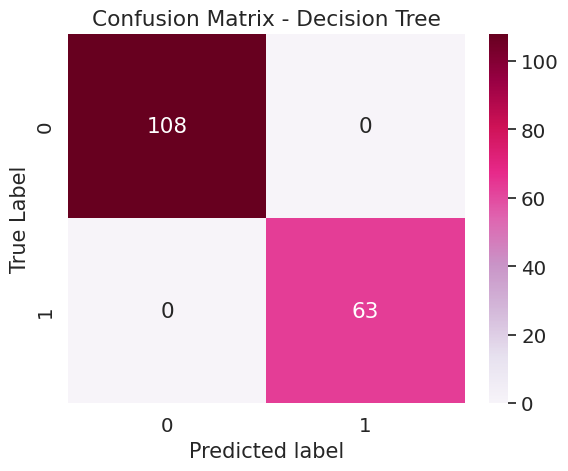

<Figure size 1000x700 with 0 Axes>

In [1048]:
matrix_df = pd.DataFrame(confusion_matrix(y_test,dt))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="PuRd")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

#1st Model with fine tunning

Maing changes:
- Random state 150
- Split dataset 75% Train, 25% Test

In [1049]:
dt = DecisionTreeClassifier()


In [1050]:
# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150)
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=150)

In [1051]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (426, 31)
Shape of test set: (143, 31)


In [1052]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=150)

In [1053]:
# Evaluate the model's accuracy on the test set
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy Decision Tree Tuned: {accuracy * 100:.2f}%")


Model Accuracy Decision Tree Tuned: 100.00%


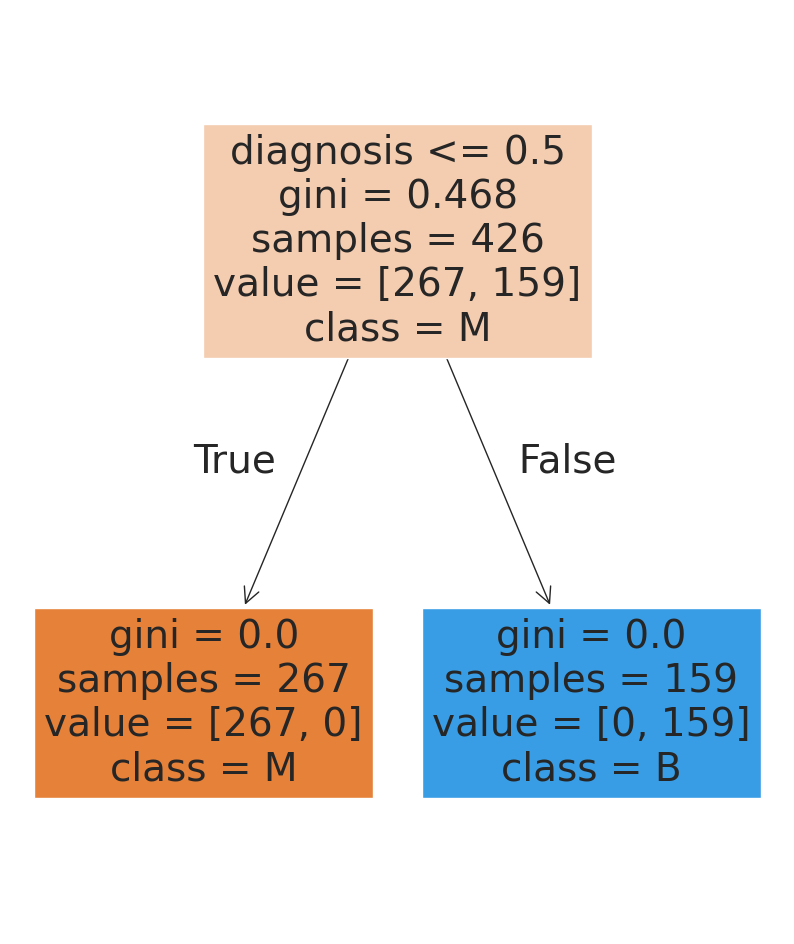

In [1054]:

# Visualize the Decision Tree
plt.figure(figsize=(10, 12))
plot_tree(clf, feature_names=df_models.columns, class_names=['M','B'], filled=True)
plt.show()

In [1055]:
clf = DecisionTreeClassifier(max_depth = 3, min_samples_split = 5,
min_samples_leaf = 10, max_leaf_nodes = 15, max_features = "log2", random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9577464788732394, 0.9790209790209791)

In [1056]:
dt=clf.predict(X_test)

In [1057]:
print(f" Classification report :\n {classification_report(y_test,dt)}")

 Classification report :
               precision    recall  f1-score   support

           B       0.97      1.00      0.98        90
           M       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [1058]:
print("Accuracy (Test Set): %.3f" % accuracy_score(y_test,dt))
print("F1-Score (Test Set): %.3f" % f1_score(y_test,dt,pos_label="M")) #We use in adition pos_label because the target value is categorical instead of numerical

Accuracy (Test Set): 0.979
F1-Score (Test Set): 0.971


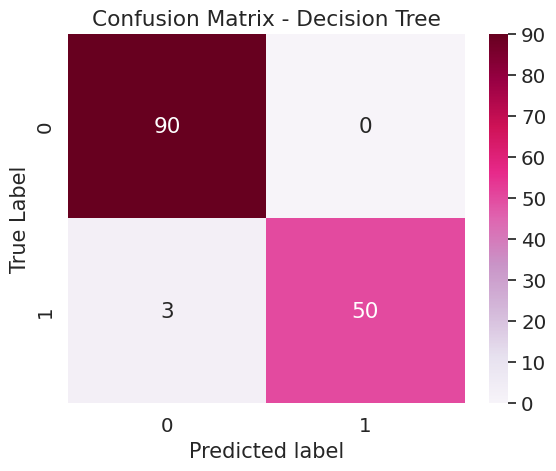

<Figure size 1000x700 with 0 Axes>

In [1059]:
matrix_df = pd.DataFrame(confusion_matrix(y_test,dt))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="PuRd")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()  # Here I need to focus in reduces true negatives!!!

#2nd Model "Random Forest"




In [1060]:
# Train model

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [1061]:
predictions = model.predict(X=X_test)
precision = accuracy_score(predictions, y_test)

print(predictions)

['B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B']


In [1062]:
# Check accuracy of the model

print(f'Accuracy:{precision:.2%}  ')

Accuracy:100.00%  


#2nd Model with fine Tuning

In [1063]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

In [1064]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 31)
Shape of test set: (114, 31)


In [1065]:
# Train model

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [1066]:
predictions = model.predict(X=X_test)
precision = accuracy_score(predictions, y_test)

print(predictions)

['B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B']


In [1067]:
# Check accuracy of the model

print(f'Accuracy Random Forest Tuned:{precision:.2%}  ')

Accuracy Random Forest Tuned:100.00%  


Random Forest 2nd way to code

In [1068]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

In [1069]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=150)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=150)

In [1070]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [1071]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[72  0]
 [ 0 42]]

Classification Report:
               precision    recall  f1-score   support

           B       1.00      1.00      1.00        72
           M       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Accuracy: 100.00%


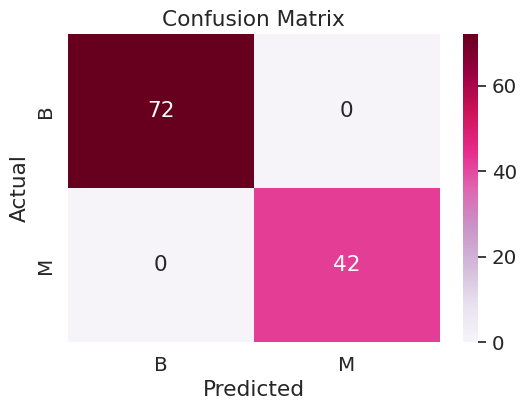

In [1072]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#3rd Model "SVM"


In [1073]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [1074]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455,), (114,))

In [1075]:
# SVM classifier
svm = SVC(kernel='linear', C=1, gamma='scale', random_state=42)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [1076]:
svm.score(X_train, y_train)

1.0

In [1077]:
#Prediction the result
y_pred = svm.predict(X_test)
y_pred

array(['M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B'], dtype=object)

In [1078]:
accuracy_score(y_test, y_pred)

1.0

In [1079]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[66  0]
 [ 0 48]]


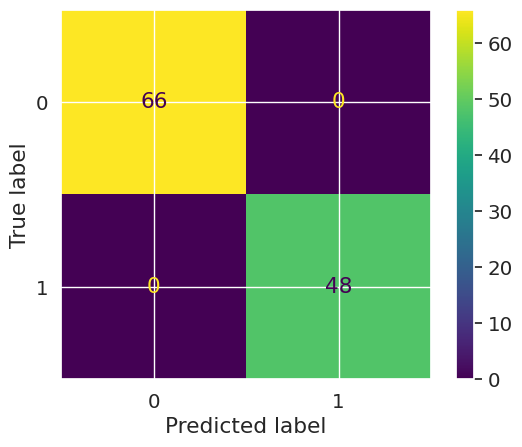

In [1080]:
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.show()

In [1081]:
print(f" Classification report :\n {classification_report(y_test,y_pred)}")

 Classification report :
               precision    recall  f1-score   support

           B       1.00      1.00      1.00        66
           M       1.00      1.00      1.00        48

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



#3rd Model with Fine Tunning




In [1082]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=120)

In [1083]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 31), (171, 31), (398,), (171,))

In [1084]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.613 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [1085]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)


In [1086]:
# SVM classifier
svm = SVC(kernel='rbf', C=10, gamma=0.01, random_state=120)

# Fit the classifier to the training data
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.01, random_state=120)

In [1087]:
svm.score(X_train, y_train)

1.0

In [1088]:
#Prediction the result
y_pred = svm.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B'], dtype=object)

In [1089]:
accuracy_score(y_test, y_pred)

0.6608187134502924

In [1090]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[113   0]
 [ 58   0]]


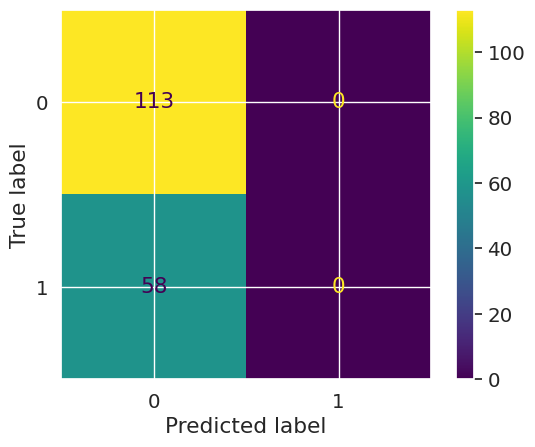

In [1091]:
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.show()

Other aproach to train and compare models


In [1092]:
# Target variable mapping (M = 1, B = 0)
df_cap['diagnosis'] = y.map({'M': 1, 'B': 0})


In [1093]:
# Dictionary of the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []